
# Lab | Data Transformations

In today's lesson, we talked about continuous distributions (mainly normal distribution), linear regression, and how multicollinearity can impact the model. In this lab, we will test your knowledge of those things using the `marketing_customer_analysis.csv` file. You can continue using the same Jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the Jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column `total_claim_amount`. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.
- Plot the heatmap of the correlation matrix after the filtering.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# to import cleanfunctions.py module from a different location than the current project

import sys

sys.path.append('/Users/minhnguyen/IronHack2023-2024/Bootcamp/')

import cleanfunctions

In [15]:
# check for the list of current searching locations 
print(sys.path)

['/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/2.1_lab-data-transformations', '/Users/minhnguyen/anaconda3/lib/python311.zip', '/Users/minhnguyen/anaconda3/lib/python3.11', '/Users/minhnguyen/anaconda3/lib/python3.11/lib-dynload', '', '/Users/minhnguyen/anaconda3/lib/python3.11/site-packages', '/Users/minhnguyen/anaconda3/lib/python3.11/site-packages/aeosa', '/Users/minhnguyen/IronHack2023-2024/Bootcamp/', '/Users/minhnguyen/IronHack2023-2024/Bootcamp/', '/Users/minhnguyen/IronHack2023-2024/Bootcamp/']


In [16]:
# read the cleaned version of the marketing_customer_analysis.csv
# from the previous lab

marketing_customer_df1 = pd.read_csv('/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/1.4_lab-dw-data-structuring-and-combining/marketing_customer_analysis_clean.csv')
marketing_customer_df1

# the cleanned version of the marketing customer analysis from the previous lab has 10910 rows x 27 columns

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,effective_to_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medium,A,2,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medium,A,1,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medium,A,2,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medium,A,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medium,A,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury,Medium,A,1,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medium,A,1,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury,Medium,A,2,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medium,A,2,2


In [17]:
path = '/Users/minhnguyen/IronHack2023-2024/Bootcamp/Labs/2.1_lab-data-transformations/files_for_lab/csv_files/marketing_customer_analysis.csv'
marketing_customer_df2 = pd.read_csv(path)
marketing_customer_df2 

# while the version of the marketing_customer_analysis.csv provided within this lab-repo has only 9134 rows × 24 columns

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [18]:
display(marketing_customer_df1.info())
display(marketing_customer_df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [19]:
# checking the columns from df1, and df2 to see which extra columns are in df1
display(marketing_customer_df1.columns)
display(marketing_customer_df2.columns)

# the extra columns in df1 are: vehicle_type, month (which i added in the previous lab), effective_to_month


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type', 'month',
       'effective_to_month'],
      dtype='object')

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# I will use the marketing customer analysis file that provided in this repo, which I loaded above and assigned it as marketing_customer_df2


In [20]:
# check df2. info
display(marketing_customer_df2.info())

# it seems there no NaN values in df2
# double-check
display(marketing_customer_df2.isnull().sum())

# insights:
# df2 seems to be clean with no NaN value, and data type seems to be corrected
# except:
# 1. "effective to date" should be in datetime64. Since for this lab, we will work on numerical vars first, I will 
# leave this column as it is, and might convert it later when we need to work on categorical vars.
# 2. column names should be converted to lower case and no white space

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [21]:
# checking for inconsistency of data in each column using value_counts
# selfnote: should update my cleanfunctions.check_value_count_each_column method for only columns with 'object' datatype
cleanfunctions.check_value_count_each_column(marketing_customer_df2 )


Value counts of Customer 
 BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64

Value counts of State 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

Value counts of Customer Lifetime Value 
 7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: Customer Lifetime Value, Length: 8041, dtype: int64

Value counts of Response 
 No     7826
Yes    1308
Name: Response, dtype: int64

Value counts of Coverage 
 Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Value counts of Education 
 Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor 

In [22]:
# converting the column names to lowercase and no white space
marketing_customer_df2  = cleanfunctions.lower_case_no_space_colname(marketing_customer_df2 )
marketing_customer_df2 

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [23]:
# creating a dataframe with only categorical columns

# option 1
#categoricals = marketing_customer_df2.select_dtypes(include = object)

# option 2
categoricals = marketing_customer_df2.select_dtypes(object) # np.object is deprecated
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [24]:
# creating a dataframe with only numerical columns

# Option 1
#numerical  = marketing_customer_df2.select_dtypes(include = ['int64', 'float64'])
# Option 2
#numerical  = marketing_customer_df2.select_dtypes(exclude = object)

# Option 3
numerical  = marketing_customer_df2.select_dtypes(np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


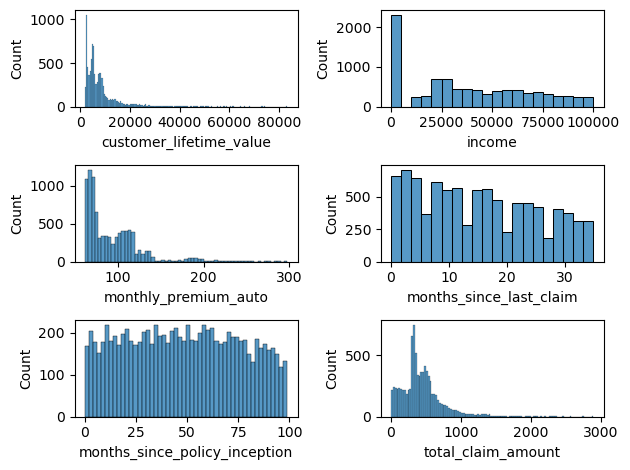

In [25]:
# checking for the normality of the numerical variables by plotting (mannually)
fig, ax = plt.subplots(3,2)
sns.histplot(marketing_customer_df2['customer_lifetime_value'], ax=ax[0,0])
sns.histplot(marketing_customer_df2['income'], ax=ax[0,1], bins=20)
sns.histplot(marketing_customer_df2['monthly_premium_auto'], ax=ax[1,0])
sns.histplot(marketing_customer_df2['months_since_last_claim'], ax=ax[1,1], bins =20)
sns.histplot(marketing_customer_df2['months_since_policy_inception'], ax=ax[2,0], bins=50)
sns.histplot(marketing_customer_df2['total_claim_amount'], ax=ax[2,1])
plt.tight_layout()
plt.show()



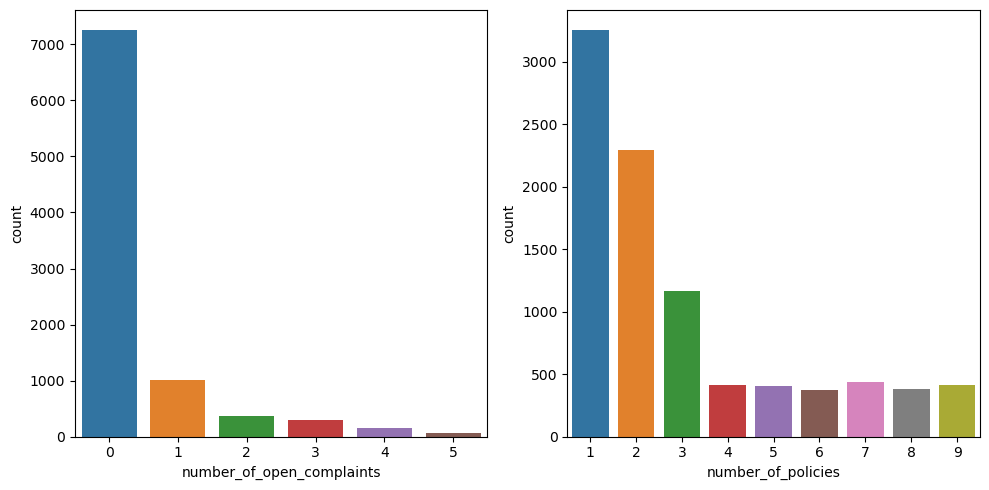

In [26]:
# showing countplot for column "number_of_open_complaints", and "number_of pilicies":

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(marketing_customer_df2, x = 'number_of_open_complaints', ax = ax[0])
sns.countplot(marketing_customer_df2, x = 'number_of_policies', ax = ax[1])

plt.tight_layout()
plt.show()

In [27]:
# checking for the normality of the numerical variables by plotting (by function)
 
def plot_distributions(X_train_num: pd.DataFrame):
    n_rows = int(X_train_num.shape[1]/2)
    n_cols = 2
    row_index = 0
    col_index = 0
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(10,5*n_rows))
    for col in X_train_num:
        sns.histplot(X_train_num[col], ax=ax[row_index, col_index])
        col_index += 1
        if col_index > 1:
            col_index = 0
            row_index += 1
    plt.tight_layout()
    plt.show()


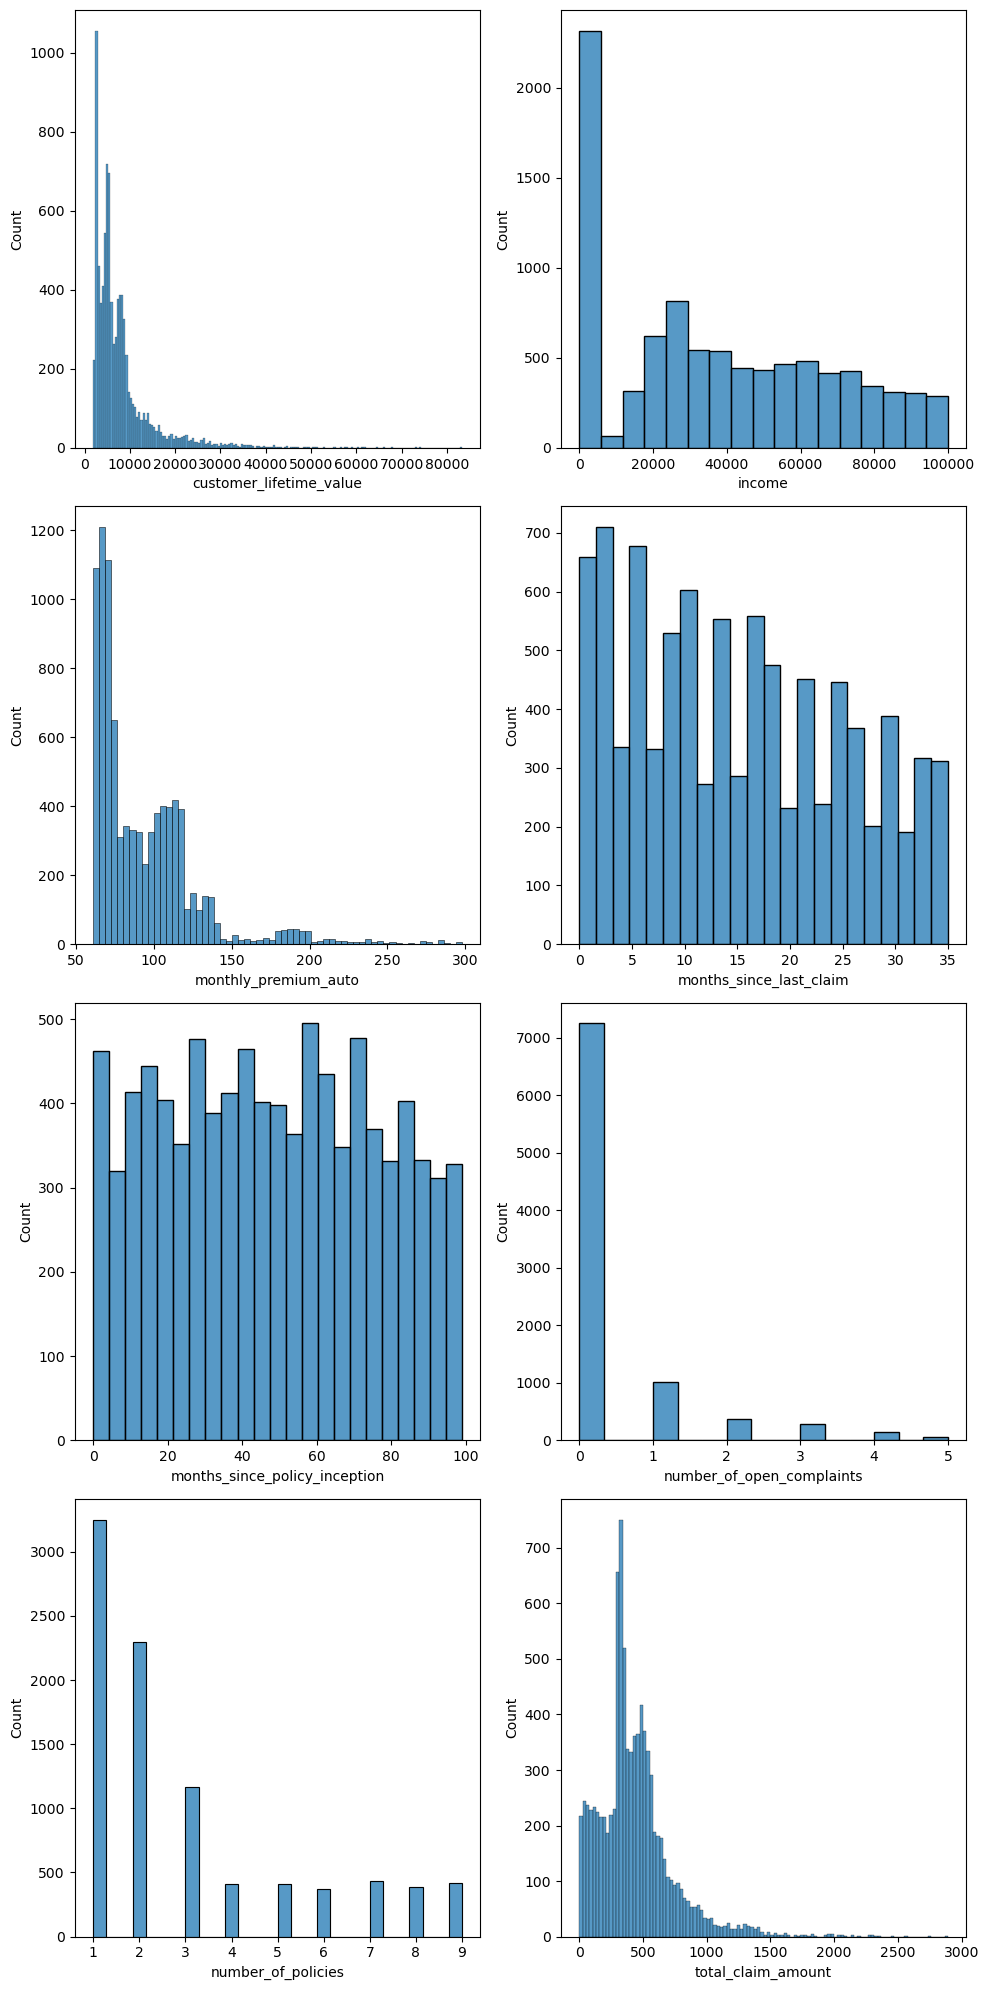

In [28]:
# plot numerical columns using function
plot_distributions(numerical)

In [29]:
# checking skewness:

for col in numerical.columns:
    print(f'The skewness of column {col} is ', round(numerical[col].skew(), 2))
    print()

The skewness of column customer_lifetime_value is  3.03

The skewness of column income is  0.29

The skewness of column monthly_premium_auto is  2.12

The skewness of column months_since_last_claim is  0.28

The skewness of column months_since_policy_inception is  0.04

The skewness of column number_of_open_complaints is  2.78

The skewness of column number_of_policies is  1.25

The skewness of column total_claim_amount is  1.71



# insights:
1. columns with skewness values within range [-0.5,0.5] are: income, months_since_last_claim, and months_since_policy_inception
2. however, column 'income' has more than 2000 records with an income in the range 0 - 5000 --> two peaks in this column?
3. for the rest: customer_lifetime_value, month_premium_auto, number_of_open_complaints, number_of_policies,total_claim_amount; their skewness values indicate an asymetrical distribution

Note: number_of_open_complaints, and number_of_policies columns have a discrete numerical data. Considering the nature of the information that these columns collect, I can imagine that it will often be positive skew. Be cautious with this types of data. 


In [30]:
# checking for 
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


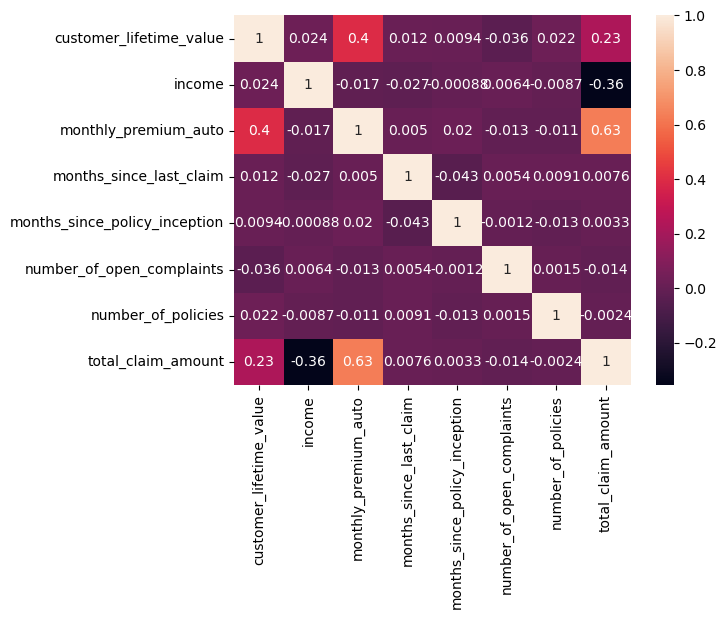

In [31]:
# showing heatmap for correlation values among numerical columns

sns.heatmap(numerical.corr(), annot = True)

plt.show()

In [32]:
# based on the computed correlation matrix, we did not observe multicollinearity among independent variables.

In [1]:
numerical_x_vars =  numerical.drop('total_claim_amount')
numerical_x_vars

NameError: name 'numerical' is not defined